<a href="https://colab.research.google.com/github/BenLBurke/Toolbelt/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/Site/'

In [ ]:
trans = pd.read_excel(path + 'retail transactions.xlsx')


In [ ]:
trans.describe()

In [ ]:
trans.head()

In [ ]:
trans['Total'] = trans.Quantity * trans.UnitPrice
slimTrans = trans[['InvoiceNo', 'InvoiceDate', 'Total', 'CustomerID']]
# slimTrans.head()

In [ ]:
value = slimTrans.groupby(['CustomerID']).agg({'Total': sum})
freq = slimTrans.groupby(['CustomerID', 'InvoiceNo'])['InvoiceNo'].count()
custFreq = freq.groupby(['CustomerID']).sum()
recent = slimTrans.groupby(['CustomerID']).agg({'InvoiceDate': max})

In [ ]:
recent

In [ ]:
bins = 3

In [ ]:
custDist = slimTrans['CustomerID'].unique()
cust = pd.DataFrame(custDist, columns=['CustomerID'])

In [ ]:
valueBin = pd.qcut(value.Total, bins, retbins= True)
freqBin = pd.qcut(custFreq, bins, retbins= True)
recentBin = pd.qcut(recent.InvoiceDate, bins, retbins= True)

In [ ]:
valueBinV = pd.qcut(value.Total, bins, retbins= True, labels=False)
freqBinV = pd.qcut(custFreq, bins, retbins= True, labels=False)
recentBinV = pd.qcut(recent.InvoiceDate, bins, retbins= True, labels=False)

In [ ]:
vCustM = cust.merge(valueBinV[0], on = "CustomerID")
vCustRM = vCustM.merge(recentBinV[0], on = 'CustomerID')
vCustRFM = vCustRM.merge(freqBinV[0], on = 'CustomerID')

In [ ]:
print(valueBin[0])
print(valueBin[1])

In [ ]:
custM = cust.merge(valueBin[0], on = "CustomerID")
custRM = custM.merge(recentBin[0], on = 'CustomerID')
custRFM = custRM.merge(freqBin[0], on = 'CustomerID')

In [ ]:
custRFM = custRFM.rename(columns={'Total':'mValue','InvoiceDate':'Recency','InvoiceNo':'Frequency'})
custRFM

In [ ]:
vCustRFM = vCustRFM.rename(columns={'Total':'vMValue','InvoiceDate':'vRecency','InvoiceNo':'vFrequency'})

In [ ]:
customerRFM = vCustRFM.merge(custRFM, on = 'CustomerID')
customerRFM

In [ ]:
customerRFM['score'] = customerRFM[ 'vRecency'].map(str) + customerRFM['vFrequency'].map(str) + customerRFM['vMValue'].map(str)
customerRFM

#Visualize
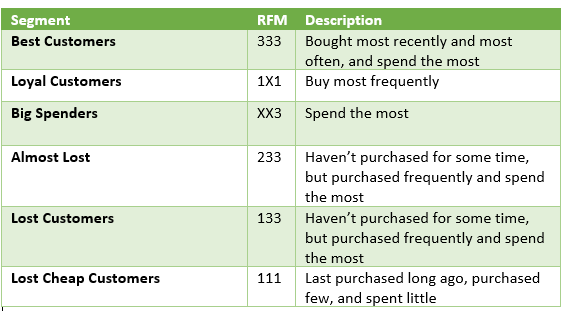

In [ ]:
customerRFM['Segment'] = "no category"

In [ ]:
for index, row in customerRFM.iterrows():
  if customerRFM.iloc[index, 7] == '333':
    customerRFM.iloc[index, 8] = 'Best Customers'
  elif customerRFM.iloc[index, 7] == '111':
    customerRFM.iloc[index, 8] = 'Lost Cheap Customers'
  elif customerRFM.iloc[index, 7] == '233':
    customerRFM.iloc[index, 8] = 'Almost Lost'
  elif customerRFM.iloc[index, 7] == '133':
    customerRFM.iloc[index, 8] = 'Lost Customer'
  

In [ ]:
for index, row in customerRFM.iterrows():
  if customerRFM.iloc[index, 2] == 1 and customerRFM.iloc[index, 8] == 'no category':
    customerRFM.iloc[index, 8] = 'Loyal Customers'
  elif customerRFM.iloc[index, 1] == 3 and customerRFM.iloc[index, 8] == 'no category':
    customerRFM.iloc[index, 8] = 'Big Spenders'

In [ ]:
print(customerRFM.Segment.value_counts())
print(customerRFM.Segment.isnull().count())

In [ ]:
counts = customerRFM.Segment.value_counts()
print(type(counts))
print(counts.index)
finalCounts = counts.drop('no category',0)

In [ ]:
plt.figure(figsize=(14, 8))

plt.bar(finalCounts.index, finalCounts)
plt.savefig(path + 'RFMbarChart.png')
plt.show()

In [ ]:
df = customerRFM[['CustomerID','vRecency','vFrequency', 'vMValue', 'score']]
df.rename(columns= {'vRecency':'Recency', 'vFrequency': 'Frequency', 'vMValue': 'Monetary Value', 'score':'RFM'})